# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [134]:
from unittest.mock import inplace

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [108]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [110]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [111]:
df_filt  = df[['longitude', 'latitude', 'housing_median_age', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]
df_filt# Step 1: Select only numeric columns from the dataframe

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND


In [112]:
#selecionando as colunas numerica do dataframe
numeric_df = df_filt.select_dtypes(include=[np.number])  # Filters numeric columns only

In [113]:
# calculando a correlacao da matrix
correlation_matrix = numeric_df.corr()

In [114]:
#confirme ou imprima a matriz de correlação para verificar o resultado
print("Computed Correlation Matrix:")
print(correlation_matrix)

Computed Correlation Matrix:
                    longitude  latitude  housing_median_age  population  \
longitude            1.000000 -0.924664           -0.108197    0.099773   
latitude            -0.924664  1.000000            0.011173   -0.108785   
housing_median_age  -0.108197  0.011173            1.000000   -0.296244   
population           0.099773 -0.108785           -0.296244    1.000000   
households           0.055310 -0.071035           -0.302916    0.907222   
median_income       -0.015176 -0.079809           -0.119034    0.004834   
median_house_value  -0.045967 -0.144160            0.105623   -0.024650   

                    households  median_income  median_house_value  
longitude             0.055310      -0.015176           -0.045967  
latitude             -0.071035      -0.079809           -0.144160  
housing_median_age   -0.302916      -0.119034            0.105623  
population            0.907222       0.004834           -0.024650  
households            1.000000

A correlação entre longitude e latitude é -0.924664, o que indica uma forte correlação negativa (quando uma aumenta, a outra tende a diminuir).
A correlação entre housing_median_age e median_house_value é -0.105623, indicando uma fraca correlação negativa (quase não há relação linear entre essas variáveis).
^^


### 3. Separe os dados em validação e teste

In [146]:
# fazendo um dropping da colunas separadas do dataframe
X = df_filt.drop(columns = ['housing_median_age', 'population', 'median_income']).copy()

In [147]:
#Codificando variáveis categóricas como variáveis fictícias
X = pd.get_dummies(X, drop_first = True)

In [157]:
#respeitando o dataframe
#imprime informações detalhadas sobre o dataframe, incluindo os tipos de dados, uso de memória e contagens não nulas
#exibe as primeiras 5 linhas do dataframe para uma rápida olhada em seus valores
print(
    X.info())
y.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   households                  20640 non-null  float64
 3   median_house_value          20640 non-null  float64
 4   ocean_proximity_INLAND      20640 non-null  bool   
 5   ocean_proximity_ISLAND      20640 non-null  bool   
 6   ocean_proximity_NEAR BAY    20640 non-null  bool   
 7   ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(4)
memory usage: 725.8 KB
None


0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: population, dtype: float64

É mostrado um gráfico relacionado à coluna population, com valores variando de 322 a 2.401 em diferentes registros. ^^


In [149]:
y =  df_filt.loc[:,'population']

y.head()

0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: population, dtype: float64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [154]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [155]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,70
O MSE da árvore com profundidade=8 é: 0,90


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

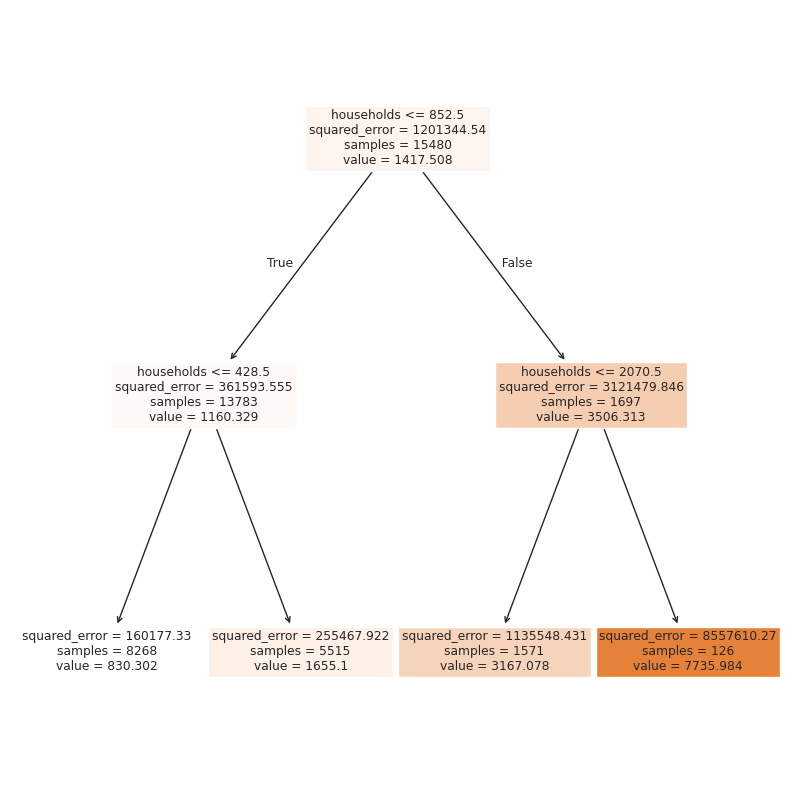

In [159]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [160]:
regr_1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

regr_1.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse1

0.7700980639210773

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.664474,0.664474,0.664474,0.664474,0.664474,0.664474,0.664474,0.664474
3,0.731755,0.731755,0.770098,0.770098,0.770098,0.770098,0.770098,0.770098
4,0.757063,0.757063,0.773365,0.766553,0.765909,0.798154,0.786097,0.786097
5,0.787329,0.787329,0.770701,0.775491,0.774846,0.807092,0.795035,0.795035
6,0.777904,0.782867,0.773412,0.777958,0.778745,0.810990,0.798821,0.798274
7,0.774360,0.780904,0.776255,0.781921,0.780682,0.812483,0.800355,0.799944
8,0.782497,0.780877,0.778414,0.786096,0.784844,0.815423,0.803160,0.802976


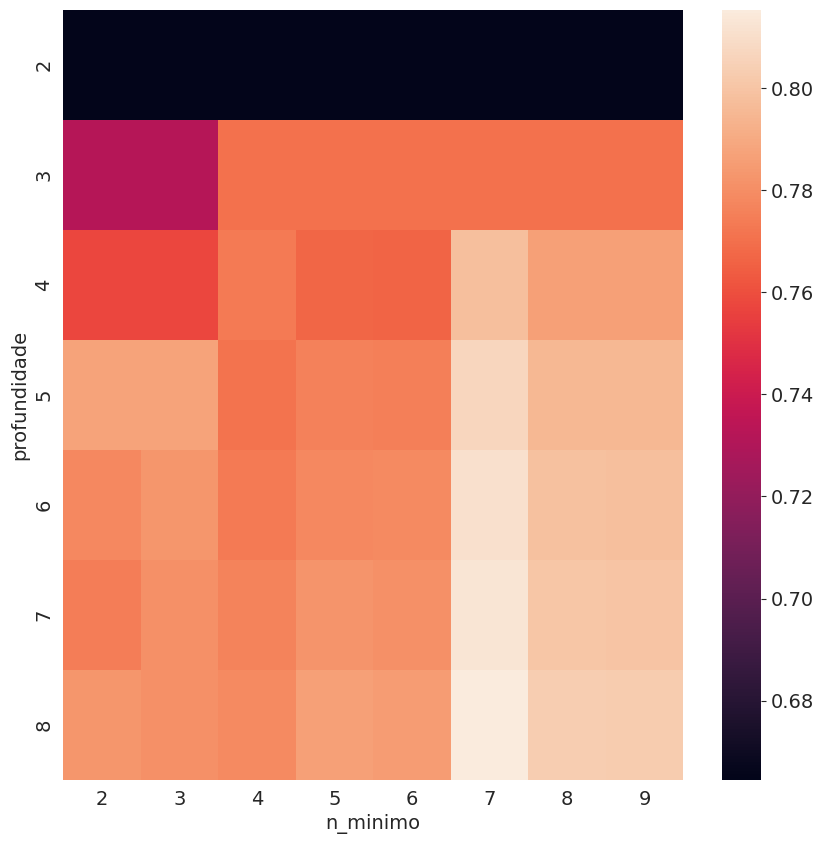

In [161]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')